In [1]:
from nozzle_design import *

In [2]:
NOELLE = Nozzle(inletPressure=35e5,
                inletTemperature=3187.5,
                exitPressure=100e3,
                thrust=1000,
                gas="Air",
                motor=False,
                n=100)

In [3]:
NOELLE.addCooling(channelHeight=1e-3,
                channelWidth=1e-3,
                numberOfChannels=30,
                coolantType='Ethanol+Water',
                coolantWaterFraction=0.08,
                k=401,
                wallThickness=2e-3,
                coolantExcess=1.5,
                coolantMassFlow=0.1,
                coolantInletTemperature=300,
                coolantPressure=60e5
                )

Input nozzle data: 

Inlet Pressure:  3500.0 kPa
Inlet Temperature:  3187.5 K
Thrust:  1000 N
Discretization:  100 
 

Input cooling data: 

Channel Height:  1.0 mm
Channel Width:  1.0 mm
Number of channels:  30
Coolant mass flow:  0.15000000000000002 kg/s
Coolant Temperature:  300 K
Coolant Pressure:  6000.0 kPa
Coolant Type:  Ethanol+Water
Coolant water fraction:  8.0 %
Wall conductivity:  401 W/mK
Wall thickness:  2.0 mm 
 

Nozzle design parameters: 

Throat diameter:  15.856215479353157 mm
Exit diameter:  32.132994053554384 mm
Epsilon:  4.10679769123322
Exit temperature:  1154.2181387829903 K
Exit Mach:  2.9678356533735575
Exit velocity:  2021.104465183572 m/s
Nozzle mass flow rate:  0.49477897715157065 kg/s
Specific Impulse (ISP):  206.02491999832537 s 
 

Coolant data: 

Coolant rho:  796.8768347114864
Coolant viscosity:  0.0006444346220580365
Coolant conductivity (k):  0.23263884686166333
Coolant Prandtl number (Pr):  8.006421095120345
Reynolds number:  7758.738945515113
Coolan

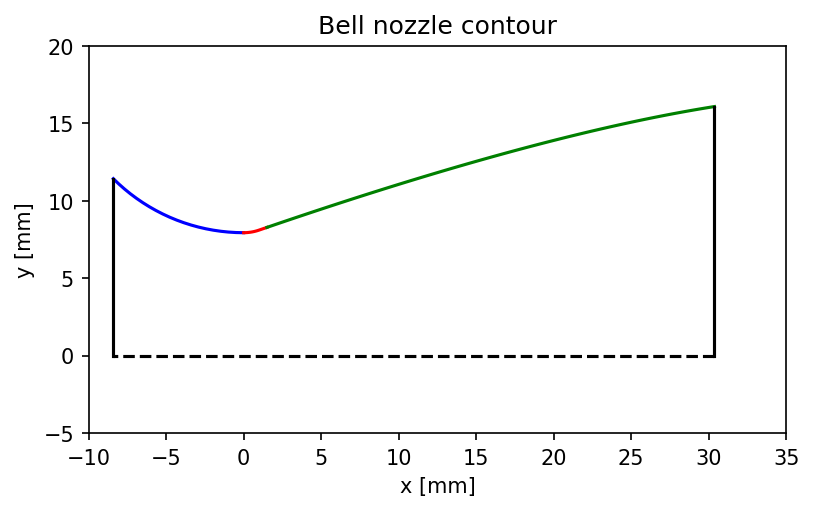

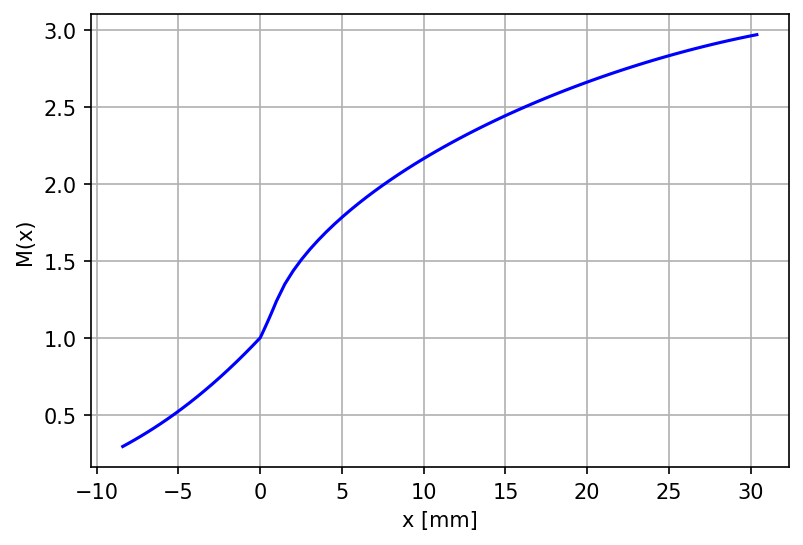

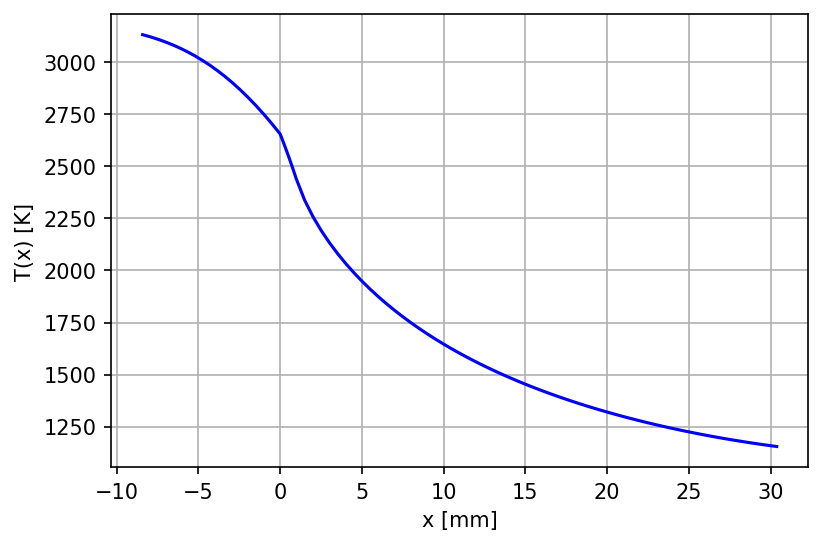

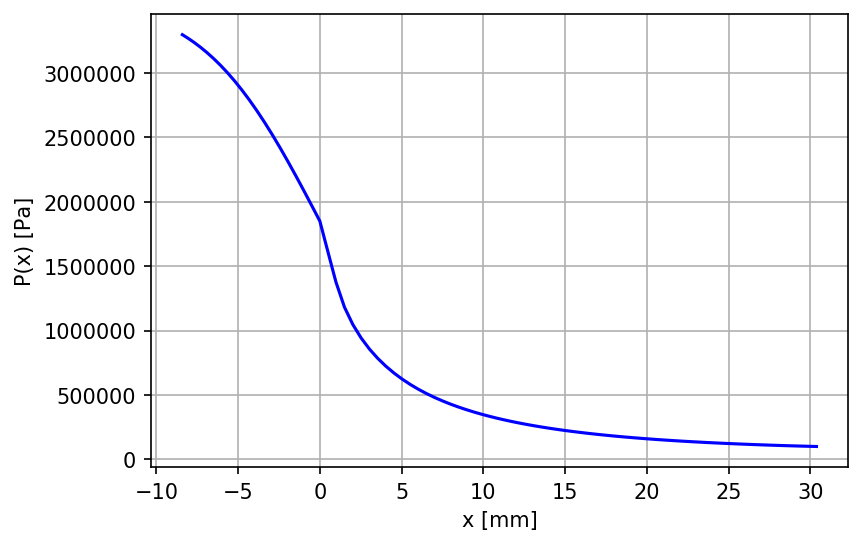

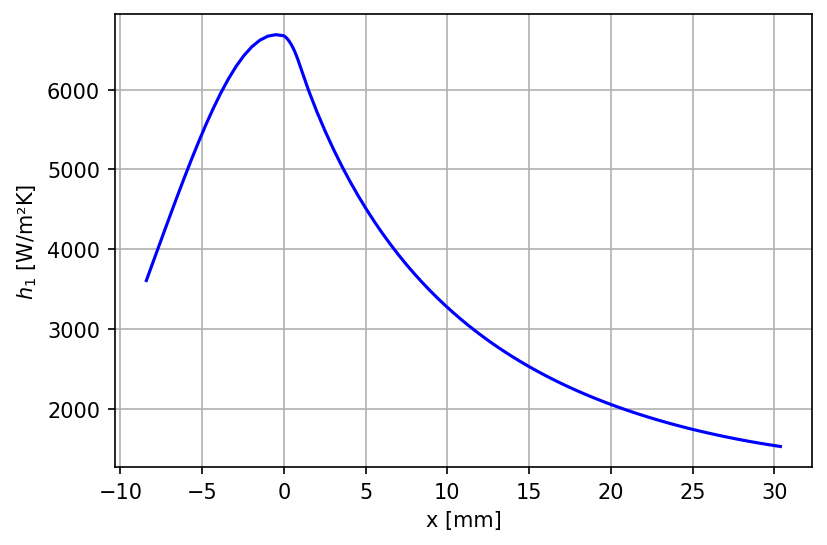

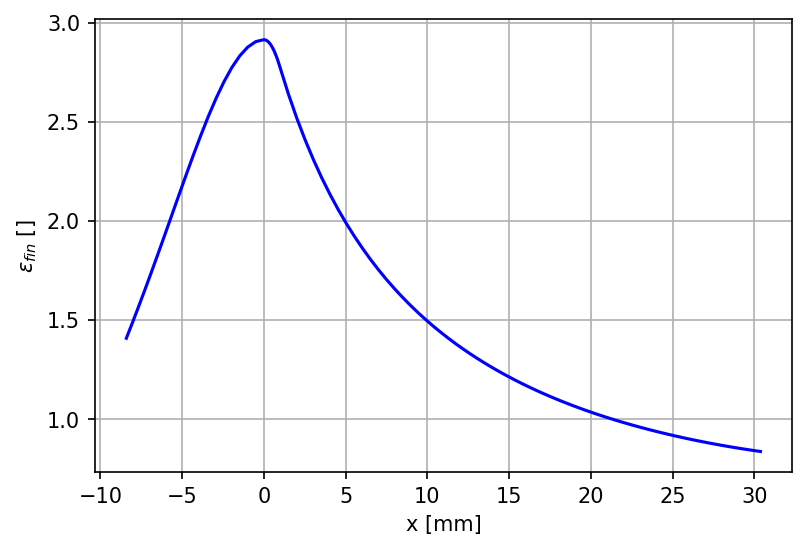

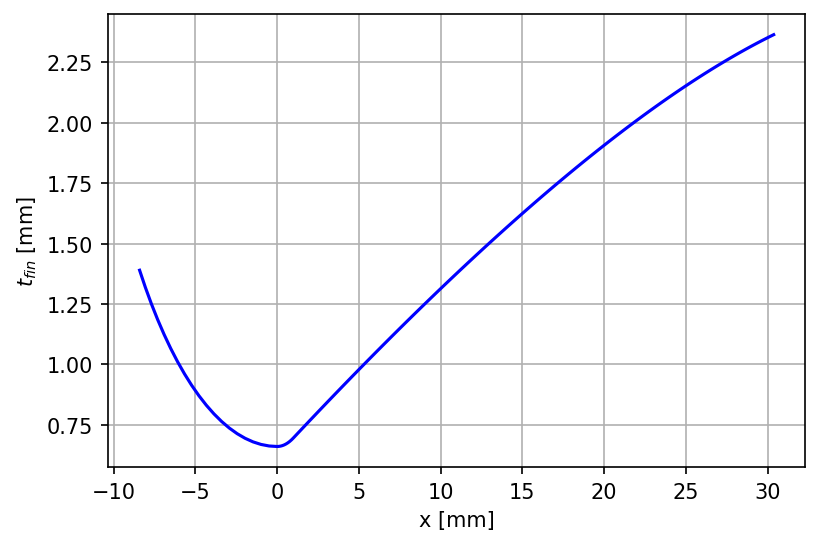

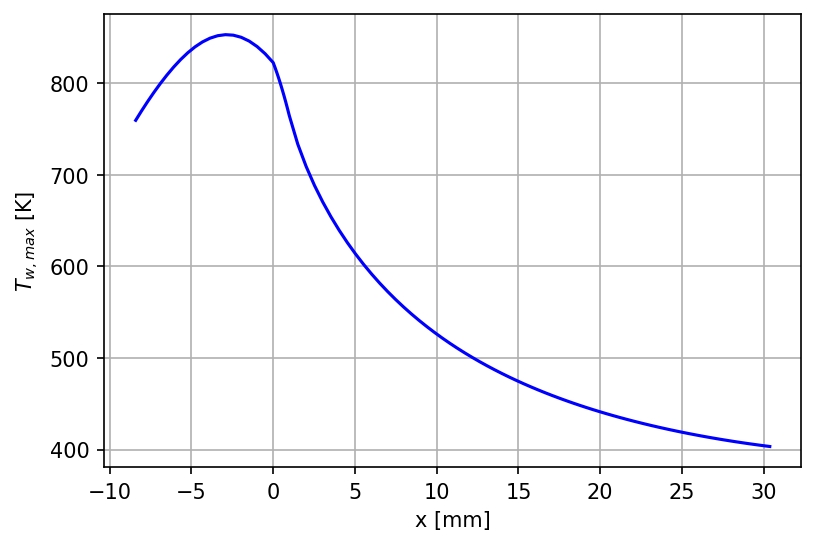

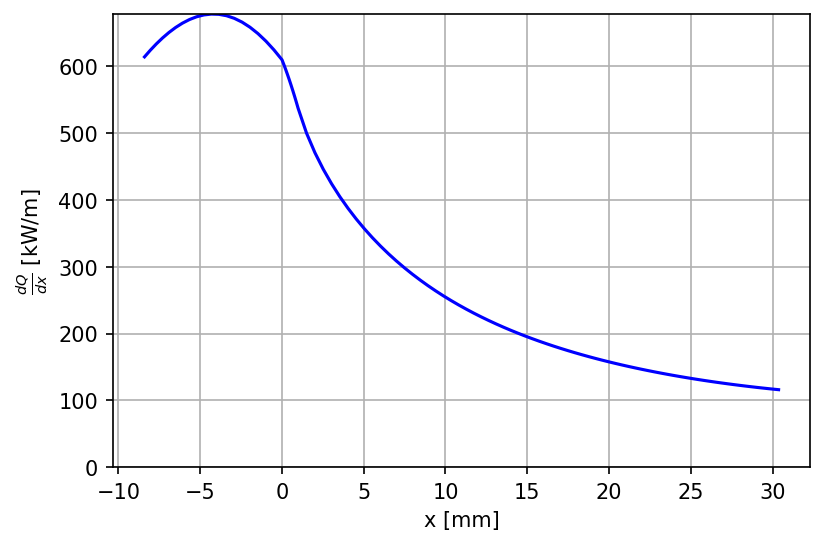

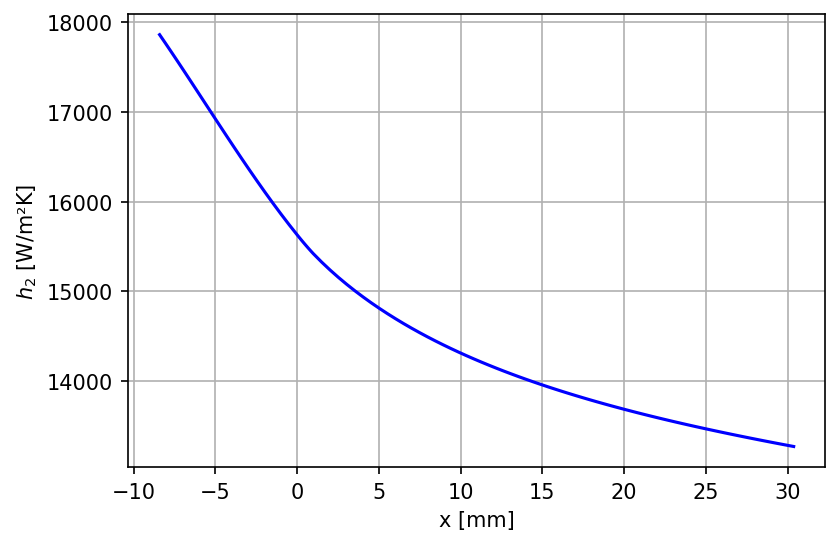

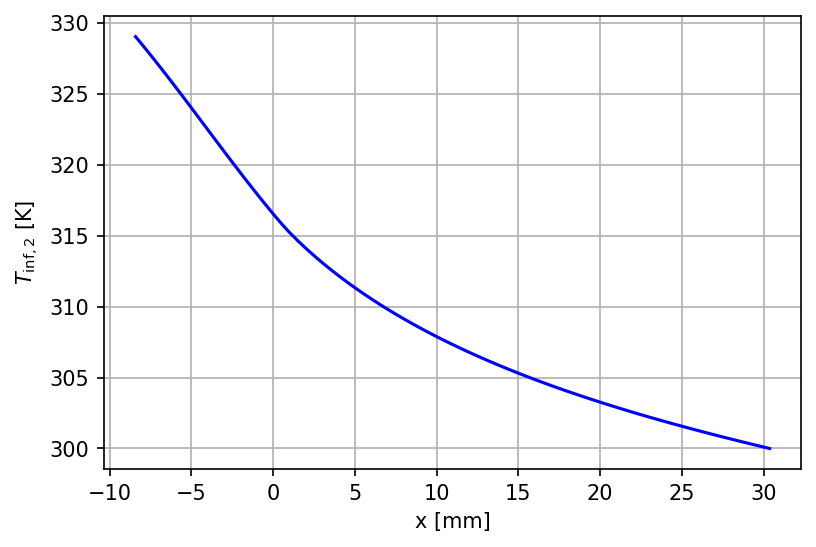

In [4]:
NOELLE.allInfo()

In [5]:
NOELLE.getBartzHotH()

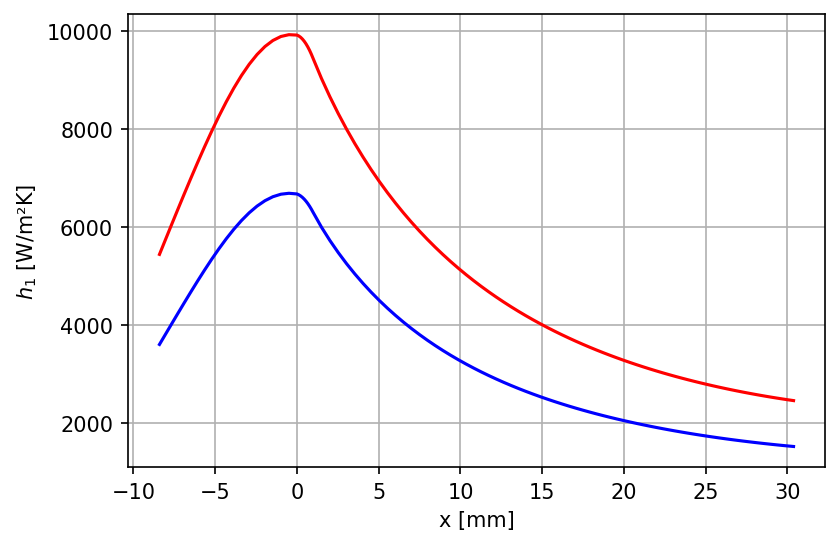

In [6]:
plt.figure(dpi=150)
plt.plot(1000*np.array(NOELLE.xGeometry), NOELLE.gasH, 'b')
plt.plot(1000*np.array(NOELLE.xGeometry), NOELLE.gasH2, 'r')
plt.xlabel("x [mm]")
plt.ylabel(r"$h_{1}$ [W/m²K]")
plt.grid(True)
#plt.savefig('h1_contour.png', dpi=300)
plt.show()

In [7]:
NOELLE.gasH2

array([5443.79584966, 5734.75413755, 6035.88744262, 6345.7891901 ,
       6662.65671999, 6984.25990153, 7307.92027607, 7630.50492905,
       7948.43943519, 8257.74396321, 8554.09585001, 8832.92057667,
       9089.51108697, 9319.17286713, 9517.38935633, 9679.99939986,
       9803.37599442, 9884.59393774, 9921.57355301, 9913.18863607,
       9895.36601548, 9868.3713362 , 9832.3188234 , 9787.37259105,
       9733.74473113, 9671.69282275, 9601.516918  , 9523.55606771,
       9438.18445887, 9027.51038086, 8655.37629744, 8313.06407694,
       7996.0444209 , 7701.21132312, 7426.17022112, 7168.96318607,
       6927.93532299, 6701.65892496, 6488.88536509, 6288.51200733,
       6099.55804858, 5921.14608537, 5752.48757708, 5592.8710933 ,
       5441.65262898, 5298.24750425, 5162.12350913, 5032.79504636,
       4909.81808765, 4792.78580168, 4681.32474332, 4575.09151575,
       4473.76983456, 4377.06793564, 4284.71627881, 4196.46550738,
       4112.08462986, 4031.35939561, 3954.09084023, 3880.09397

In [8]:
NOELLE.gasH2

array([5443.79584966, 5734.75413755, 6035.88744262, 6345.7891901 ,
       6662.65671999, 6984.25990153, 7307.92027607, 7630.50492905,
       7948.43943519, 8257.74396321, 8554.09585001, 8832.92057667,
       9089.51108697, 9319.17286713, 9517.38935633, 9679.99939986,
       9803.37599442, 9884.59393774, 9921.57355301, 9913.18863607,
       9895.36601548, 9868.3713362 , 9832.3188234 , 9787.37259105,
       9733.74473113, 9671.69282275, 9601.516918  , 9523.55606771,
       9438.18445887, 9027.51038086, 8655.37629744, 8313.06407694,
       7996.0444209 , 7701.21132312, 7426.17022112, 7168.96318607,
       6927.93532299, 6701.65892496, 6488.88536509, 6288.51200733,
       6099.55804858, 5921.14608537, 5752.48757708, 5592.8710933 ,
       5441.65262898, 5298.24750425, 5162.12350913, 5032.79504636,
       4909.81808765, 4792.78580168, 4681.32474332, 4575.09151575,
       4473.76983456, 4377.06793564, 4284.71627881, 4196.46550738,
       4112.08462986, 4031.35939561, 3954.09084023, 3880.09397

In [18]:
Tw_i = 850
T0 = 3187
M_i = 1
gamma = 1.4
w = 0.6
D_i = 15.85/1000

sigma_i = 1/(((0.5*(Tw_i/T0)*(1 + (M_i**2)*(gamma-1)/2) + 0.5)**(0.8-w/5))*((1 + (M_i**2)*(gamma-1)/2)**(w/5)))

In [19]:
sigma_i

1.3397795193842166

In [24]:
rho = NOELLE.rho_vector[0]
viscosity = NOELLE.viscosity_vector[0]
Pr = NOELLE.Pr_vector[0]
k = NOELLE.k_vector[0]
Cp = Pr*k/viscosity

A_i = 0.25*pi*D_i**2
flowRate = NOELLE.massFlow/rho
velocity = flowRate/A_i

h = (0.026/(D_i**0.2))* ((viscosity**0.2)*Cp/(Pr**0.6)) * ((rho*velocity)**0.8)

In [25]:
h

7623.783772929659

In [26]:
max(NOELLE.gasH)

6689.2722032798665